Python environment

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
import scanpy as sc
import torch
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
sc.settings.n_jobs = 8

In [ ]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

### Read raw count matrix and add metadata

In [ ]:
adata = sc.read_10x_h5('data/core_GBmap_raw_counts.h5')
adata

AnnData object with n_obs × n_vars = 431535 × 36498
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
adata.var_names_make_unique()

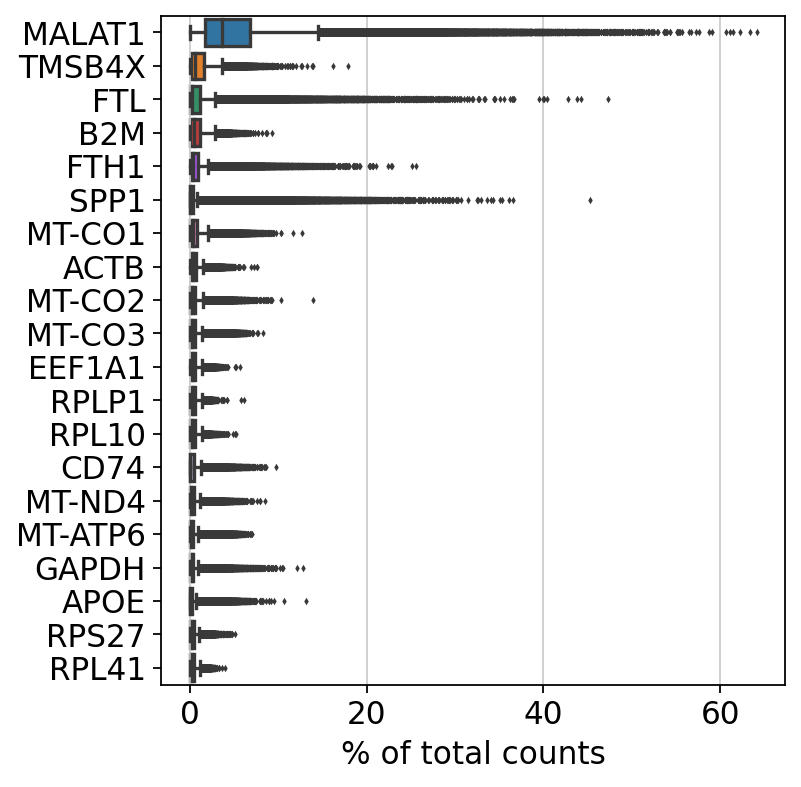

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
metadata = pd.read_csv('data/core_GBmap_metadata.csv', index_col=0)
metadata

/hpc/pmc_stunnenberg/cruiz/miniconda3/envs/scarches/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,author,patient,celltype_malignant,celltype_major,celltype_minor,gender,location,EGFR,platform,method,...,sample,celltype_original,KI_67,region,Tissue,IDH,chr1p19q,stage,Verhaak_classification,PDGFR
PJ017_0,Yuan2018,PJ017,Malignant cells,AC-like Malignant,AC-like Malignant,Male,Left temporal,amplified,Microwell-seq,cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJ017_1,Yuan2018,PJ017,Malignant cells,AC-like Malignant,AC-like Malignant,Male,Left temporal,amplified,Microwell-seq,cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJ017_2,Yuan2018,PJ017,Immune cells,Mono/Macro,Monocyte,Male,Left temporal,amplified,Microwell-seq,cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJ017_3,Yuan2018,PJ017,Malignant cells,AC-like Malignant,AC-like Malignant,Male,Left temporal,amplified,Microwell-seq,cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PJ017_4,Yuan2018,PJ017,Malignant cells,AC-like Malignant,AC-like Malignant,Male,Left temporal,amplified,Microwell-seq,cell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NH19-565_TTTGTTGGTACTGAGG-1,Ruiz2021,NH19-565,NaN,NaN,NaN,Female,Right temporal,WT,10x_v3,nuclei,...,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH19-565_TTTGTTGGTTCCTTGC-1,Ruiz2021,NH19-565,NaN,NaN,NaN,Female,Right temporal,WT,10x_v3,nuclei,...,NaN,AC-like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH19-565_TTTGTTGTCAAAGGTA-1,Ruiz2021,NH19-565,NaN,NaN,NaN,Female,Right temporal,WT,10x_v3,nuclei,...,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH19-565_TTTGTTGTCAATGTCG-1,Ruiz2021,NH19-565,NaN,NaN,NaN,Female,Right temporal,WT,10x_v3,nuclei,...,NaN,Oligodendrocyte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
adata.obs['author'] = metadata['author'].values
adata.obs['patient'] = metadata['patient'].values
adata.obs['celltype_malignant'] = metadata['celltype_malignant'].values
adata.obs['celltype_major'] = metadata['celltype_major'].values
adata.obs['celltype_minor'] = metadata['celltype_minor'].values
adata.obs['gender'] = metadata['gender'].values
adata.obs['location'] = metadata['location'].values
adata.obs['EGFR'] = metadata['EGFR'].values
adata.obs['platform'] = metadata['platform'].values
adata.obs['method'] = metadata['method'].values
adata.obs['age'] = metadata['age'].values
adata.obs['MET'] = metadata['MET'].values
adata.obs['p53'] = metadata['p53'].values
adata.obs['TERT'] = metadata['TERT'].values
adata.obs['ATRX'] = metadata['ATRX'].values
adata.obs['PTEN'] = metadata['PTEN'].values
adata.obs['MGMT'] = metadata['MGMT'].values
adata.obs['sample'] = metadata['sample'].values
adata.obs['celltype_original'] = metadata['celltype_original'].values
adata.obs['KI_67'] = metadata['KI_67'].values
adata.obs['region'] = metadata['region'].values
adata.obs['Tissue'] = metadata['Tissue'].values
adata.obs['chr1p19q'] = metadata['chr1p19q'].values
adata.obs['stage'] = metadata['stage'].values
adata.obs['Verhaak_classification'] = metadata['Verhaak_classification'].values
adata.obs['PDGFR'] = metadata['PDGFR'].values

In [ ]:
metadata = pd.read_csv('data/core_GBmap_cellID.csv', index_col=0)
adata.obs['gs_prediction'] = metadata['gs_prediction'].values

In [ ]:
metadata = pd.read_csv('data/core_GBmap_cnv_metadata.csv', index_col=0)
adata.obs['predCNA'] = metadata['predCNA'].values

In [ ]:
metadata = pd.read_csv('data/assigned_broad_celltypes_core_GBmap.csv', index_col=0)
adata.obs['celltype_assigned'] = metadata['celltype_assigned'].values

In [ ]:
sc.write(adata=adata, 
         filename = 'data/core_GBmap.h5ad')